# MA(q) Parameter Estimation

The moving average model of order $q$, denoted by $\text{MA}(q)$, is defined by,

$
\begin{align}
X_t = \sum_{i=1}^q \vartheta_i \varepsilon_{t-i} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_i \sim \text{Normal}(0, \sigma)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

Here the $\vartheta_i$ are estimated given an $MA(q)$ time series. 

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import stats

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1

## Simulations

In [3]:
nsample = 1000

θ1 = numpy.array([0.2])
ma1 = arima.maq(θ1, nsample)

θ2 = numpy.array([0.2, 0.4])
ma2 = arima.maq(θ2, nsample)

θ3 = numpy.array([0.2, 0.1, 0.4])
ma3 = arima.maq(θ3, nsample)

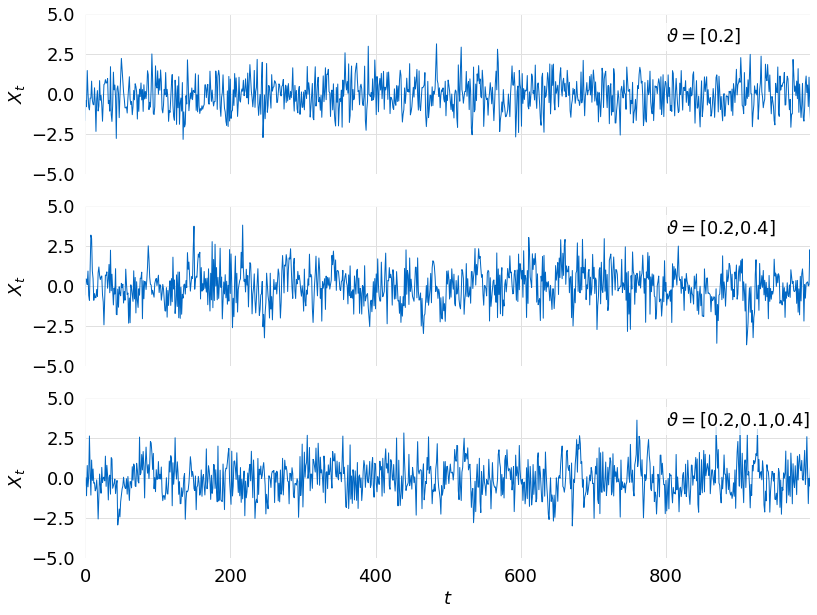

In [4]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(q) Comparison"
samples = [ma1, ma2, ma3]
plots.stack(samples, [-5.0, 5.0], title=title, labels=labels)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example

The parameter used in the $\text{MA}(q)$ simulation is $\varphi = 0.2$

In [5]:
results = arima.ma_estimate(ma1, 1)
results.polynomial_ma, results.bse

(array([1.        , 0.19172543]), array([0.03647512, 0.03021188, 0.04321026]))

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1386.324
Date:                Fri, 25 Mar 2022   AIC                           2778.647
Time:                        20:17:21   BIC                           2793.371
Sample:                             0   HQIC                          2784.243
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0301      0.036     -0.827      0.408      -0.102       0.041
ma.L1          0.1917      0.030      6.346      0.000       0.133       0.251
sigma2         0.9368      0.043     21.680      0.000       0.852       1.021
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.83   Prob(JB):                         0.73
Heteroskedasticity (H):               0.98   Skew:                             0.02
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(2)$ Example

The parameter used in the $\text{MA}(q)$ simulation is $\varphi = [0.2, 0.4]$

In [7]:
results = arima.ma_estimate(ma2, 2)
results.polynomial_ma, results.bse

(array([1.        , 0.19223275, 0.38379177]),
 array([0.05131465, 0.02889359, 0.02971782, 0.04609752]))

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1446.742
Date:                Fri, 25 Mar 2022   AIC                           2901.483
Time:                        20:17:21   BIC                           2921.114
Sample:                             0   HQIC                          2908.944
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0063      0.051     -0.123      0.902      -0.107       0.094
ma.L1          0.1922      0.029      6.653      0.000       0.136       0.249
ma.L2          0.3838      0.030     12.915      0.000       0.326       0.442
sigma2         1.0568      0.046     22.926      0.000       0.966       1.147
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.79   Prob(JB):                         0.70
Heteroskedasticity (H):               0.98   Skew:                            -0.01
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(3)$ Example

The parameter used in the $\text{MA}(q)$ simulation is $\varphi = [0.2, 0.1, 0.4]$

In [9]:
results = arima.ma_estimate(ma3, 3)
results.polynomial_ma, results.bse

(array([1.        , 0.23256838, 0.10037209, 0.37011038]),
 array([0.05338786, 0.0292978 , 0.03077962, 0.03054861, 0.0438286 ]))

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1406.181
Date:                Fri, 25 Mar 2022   AIC                           2822.361
Time:                        20:17:21   BIC                           2846.900
Sample:                             0   HQIC                          2831.688
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0337      0.053     -0.632      0.527      -0.138       0.071
ma.L1          0.2326      0.029      7.938      0.000       0.175       0.290
ma.L2          0.1004      0.031      3.261      0.001       0.040       0.161
ma.L3          0.3701      0.031     12.115      0.000       0.310       0.430
sigma2         0.9743      0.044     22.230      0.000       0.888       1.060
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.99   Prob(JB):                         0.55
Heteroskedasticity (H):               1.27   Skew:                             0.09
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""